# Title: Analysis on Wisconsin Prognostic Breast Cancer (WPBC)


## Overview & Motivation
  
   Breast Cancer is one of the most occurring cancers and also leading the cause of cancer death in the world, whereby female breast cancer alone contributes about 11.6% for mortality (AlamKhan, Ahmad & Minallah, 2013; Bray et al., 2018). According to American Cancer Society (cited in Mihaylov, Nisheva & Vassilev, 2019), the average 10-year survival rate is 83%, while the survival rate for five years is relatively 99% if and only if the cancer is located in the breast. In general, about 62% of all cases are diagnosed at this stage. 
   
   Therefore, an early diagnosis on breast cancer patients can help to save thousands of lives. Furthermore, with the application of tools of bioinformatics, computer science, statistics, and machine learning, an intensive and rapid diagnostic methods for tumor detection can be done, thus can help medical practitioners in decision making (Mihaylov, Nisheva & Vassilev, 2019). 
   
   Theoretically, this group project aims to evaluate the accuracy of the used machine learning models for survival time prediction among the breast cancer patients. Four different types of classification algorithms in machine learning were used in this project assignment to distinguish between the good and bad prognosis on breast cancer patients i.e. Recurrent and Non-Recurrent. 
   
   Salama, Abdelhalim & Zeid (2012) explained in their paper that the lymph node status is highly related to prognosis because breast cancer tends to spread firstly at the lymph node as shown in a figure below. Lymph node is considered contains no cancer when the lymph-node status is negative while it is cancer-positive when the status is positive.
   
   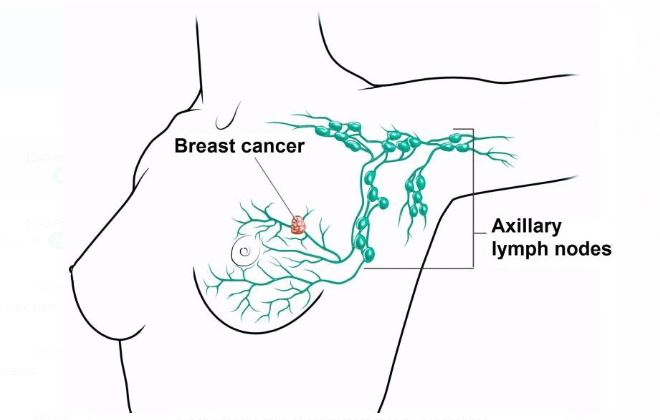

## Data Set

Data of Wisconsin Prognostic Breast Cancer (WPBC) is used for analysis in this project. The data is obtained from University of California, Irvine (UCI) Machine Learning at: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Prognostic)

Acknowledgement to:

> Dr. William H. Wolberg, General Surgery Dept., University of
    Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

> W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

> Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 


### 1 - Data Set Description

The dataset represents records of 198 patients and each record has 35 attributes. 

The attributes are:
1. Identification number of the patient. 
2. 30 real values are computed from a breast mass sample taken from the patient. The first 10 of them are mean values of features of the nuclei of the cells in the sample. The next 10 ones are standard error values of these features and the last 10 are the maximum values of them.
   * radius (mean of distances from center to points on the perimeter)
   * texture (standard deviation of gray-scale values)
   * perimeter
   * area
   * smoothness (local variation in radius lengths)
   * compactness (perimeter^2 / area - 1.0)
   * concavity (severity of concave portions of the contour)
   * concave points (number of concave portions of the contour)
   * symmetry 
   * fractal dimension ("coastline approximation" - 1)"
3. Tumor size and the number of affected lymph nodes, respectively.
4. Time to recurrence or the disease free time in months. 
5. Class value indicating the recurrence or not of cancer (’R’: recurrent, ’N’ : non recurrent).

The 30 real-valued features for mean, standard error and the mean of the three largest values (“worst” value) are computed from a digitized image of a Fine Needle Aspirate (FNA) of a breast mass.


## Related Work

1. Ojha, U., & Goel, S. (2017). A study on prediction of breast cancer recurrence using data mining techniques. Proceedings of the 7th International Conference Confluence 2017 on Cloud Computing, Data Science and Engineering, 527–530. https://doi.org/10.1109/CONFLUENCE.2017.7943207

Algorithms | Accuracy      
-----------|----------      
    C5.0   |  81.03        
    KNN    |  70.68       
Naive Bayes|  53.44
    SVM    |  81.03
    Mean   |  71.54

2. Sankareswari, M. S. A., & Phil, M. (2014). A Proportional Learning of Classifiers Using Breast Cancer Datasets. 3(11), 223–232.

Algorithms    | Accuracy
--------------|----------
    SVM       |  79.0
Decision Tree |  82.0
 
3. AlamKhan, R., Ahmad, N., & Minallah, N. (2013). Classification and Regression Analysis of the Prognostic Breast Cancer using Generation Optimizing Algorithms. International Journal of Computer Applications, 68(25), 42–47. https://doi.org/10.5120/11754-7423

Algorithms    | Accuracy
--------------|----------
 Naive Bayes  |  70.71
 Logistic Reg |  81.31
Decision Tree |  76.26

## Part 1: Initial Question

* What is the accuracy of machine learning models in predicting breast cancer survival among the patients by using Wisconsin Prognostic Breast Cancer (WPBC) dataset?

## Part 2: Data Understanding

In [84]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing our Breast Cancer dataset
dataset = pd.read_csv('wpbc_dataset.csv')

In [85]:
#reading top 5 rows of the dataset
dataset.head()

,ID Number,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension,Tumor Size,Lymph Node Status,Time,Outcome
0,119513,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,...,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5.0,31,N
1,8423,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2.0,61,N
2,842517,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,...,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0.0,116,N
3,843483,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0.0,123,N
4,843584,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0.0,27,R


In [86]:
#dimension & type dataset
print("Cancer dataset dimensions : {}".format(dataset.shape))
print((type(dataset)))

Cancer dataset dimensions : (198, 35)
<class 'pandas.core.frame.DataFrame'>


In [87]:
# summary for each column 
print((dataset.describe()))

          ID Number  Mean Radius  Mean Texture  Mean Perimeter    Mean Area  \
count  1.980000e+02   198.000000     198.00000      197.000000   198.000000   
mean   1.990469e+06    17.412323      22.27601      114.945178   970.040909   
std    2.889025e+06     3.161676       4.29829       21.401405   352.149215   
min    8.423000e+03    10.950000      10.38000       71.900000   361.600000   
25%    8.557452e+05    15.052500      19.41250       98.640000   702.525000   
50%    8.863390e+05    17.290000      21.75000      114.000000   929.100000   
75%    9.279958e+05    19.580000      24.65500      129.700000  1193.500000   
max    9.411300e+06    27.220000      39.28000      182.100000  2250.000000   

       Mean Smoothness  Mean Compactness  Mean Concavity  Mean Concave Points  \
count       198.000000        198.000000      198.000000           198.000000   
mean          0.102681          0.142648        0.156243             0.086776   
std           0.012522          0.049898     

## Part 3: Data Preprocessing

### 1 - Data Cleaning

Identify & fill in missing values

In [88]:
#identify missing values
dataset.isnull().sum()

ID Number                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             1
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
36                         0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
Tumor Size                 0
Lymph Node Status          4
Time                       0
Outcome       

There are 5 missing values:
1. Mean Perimeter - 1
2. Lymph Node Status - 4

In [89]:
# Replace missing value for Mean Perimeter with mean value
dataset['Mean Perimeter'].fillna(dataset['Mean Perimeter'].mean(),inplace=True)

In [90]:
# to view the most frequently occuring value Lymph Node Status
dataset.groupby('Lymph Node Status')['Lymph Node Status'].count()

Lymph Node Status
0.0     87
1.0     35
2.0     17
3.0      4
4.0     10
5.0      2
6.0      3
7.0      6
8.0      2
9.0      4
10.0     2
11.0     3
13.0     6
14.0     1
15.0     3
16.0     1
17.0     1
18.0     1
20.0     2
21.0     1
24.0     1
27.0     2
Name: Lymph Node Status, dtype: int64

In [91]:
# 0 has the highest count. Thus, the missing value for Lymph Node Status is filled in with O
dataset=dataset.fillna(0)

In [92]:
# to re-check for missing values
dataset.isnull().sum()

ID Number                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
36                         0
Texture SE                 0
Perimeter SE               0
Area SE                    0
Smoothness SE              0
Compactness SE             0
Concavity SE               0
Concave Points SE          0
Symmetry SE                0
Fractal Dimension SE       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
Tumor Size                 0
Lymph Node Status          0
Time                       0
Outcome       

## Part 4: Visualization

### 1 - Exploratory Data Analysis

In [93]:
# Finding out the correlation between the features
corr = dataset.corr()
corr.shape

(34, 34)

In [94]:
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

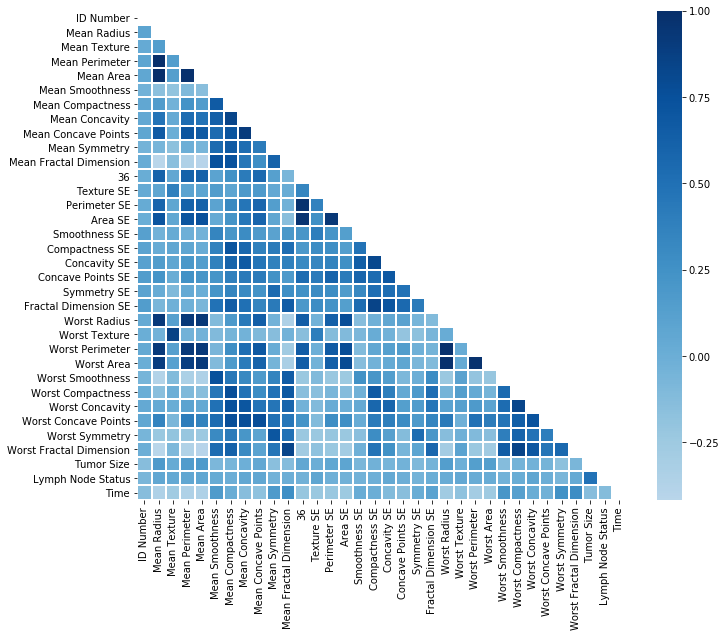

In [95]:
# Plotting the heatmap of correlation between features
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap='Blues', vmax=1, center=0, square=True, linewidths=1, cbar_kws={"shrink": 1})

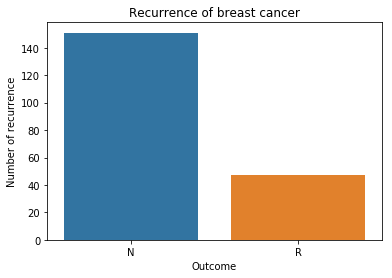


 	 The data has 198 diagnosis, 151 non-recurrence and 47 recurrence.


In [96]:
# Analyzing the target variable

plt.title('Recurrence of breast cancer')
sns.countplot(dataset['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Number of recurrence')
plt.show()

diagnosis_all = list(dataset.shape)[0]
diagnosis_categories = list(dataset['Outcome'].value_counts())

print("\n \t The data has {} diagnosis, {} non-recurrence and {} recurrence.".format(diagnosis_all, diagnosis_categories[0], diagnosis_categories[1]))

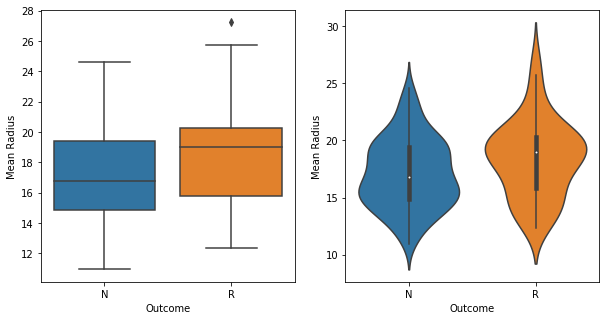

In [99]:
# Plotting correlation between outcome and radius

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Outcome", y="Mean Radius", data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x="Outcome", y="Mean Radius", data=dataset)
plt.show()

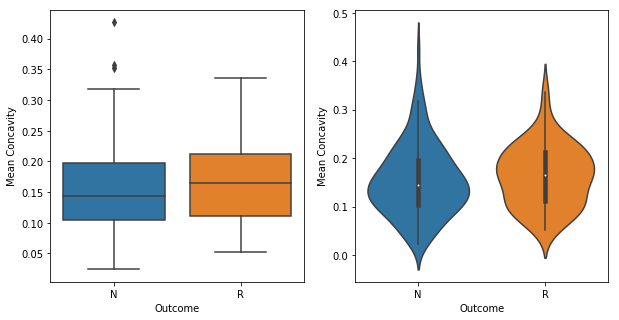

In [32]:
# Plotting correlation between outcome and concativity

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="Outcome", y="Mean Concavity", data=dataset)
plt.subplot(1,2,2)
sns.violinplot(x="Outcome", y="Mean Concavity", data=dataset)
plt.show()

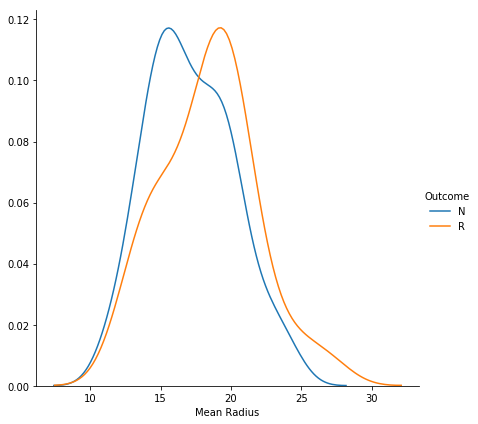

In [33]:
# Distribution density plot KDE (kernel density estimate)
sns.FacetGrid(dataset, hue="Outcome", height=6).map(sns.kdeplot, "Mean Radius").add_legend()
plt.show()

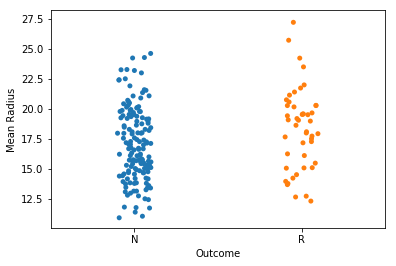

In [34]:
# Plotting the distribution of the mean radius
sns.stripplot(x="Outcome", y="Mean Radius", data=dataset, jitter=True, edgecolor="gray")
plt.show()

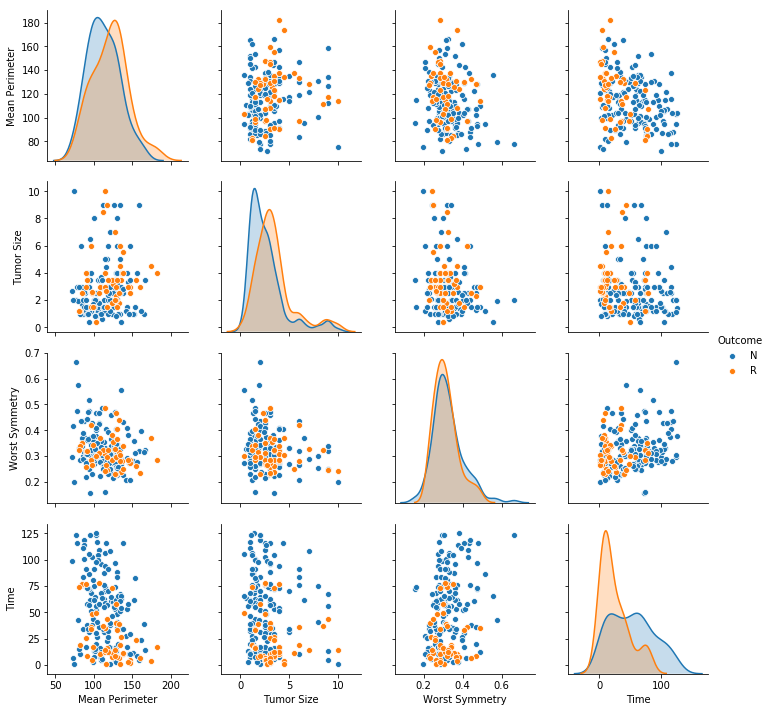

In [79]:
# Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "Outcome"
sns.pairplot(dataset, hue="Outcome", vars = ["Mean Perimeter", "Tumor Size", "Worst Symmetry", "Time"])
plt.show()

## Part 5: Modelling

We applied 4 different types of classification algorithms in Machine Learning :-

1. Gaussian Naïve Bayes
2. K-Nearest Neighbors
3. Random Forest
4. Support Vector Machines


In [33]:
# Spliting target variable and independent variables
X = dataset.drop(['Outcome'], axis = 1)
y = dataset['Outcome']

In [34]:
# Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (138, 34)
Size of test set: (60, 34)


 ### 1) Gaussian Naïve Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                # 3. fit model to data
y_model = model.predict(X_test)            # 4. predict on new data

Use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [36]:
from sklearn.metrics import accuracy_score
acc_nb = (accuracy_score(y_test, y_model))*100
print( 'Ac)curacy of Gaussian Naive Bayes model : ', acc_nb)

Ac)curacy of Gaussian Naive Bayes model :  70.0


### 2) K-Nearest Neighbors

In [37]:
# K - Nearest Neighbors

# Import library of KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN Classifier
knn = KNeighborsClassifier()

# Hyperparameter Optimization
parameters = {'n_neighbors': [3, 4, 5, 10], 
              'weights': ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size' : [10, 20, 30, 50]
             }

# Run the grid search
grid_obj = GridSearchCV(knn, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the knn to the best combination of parameters
knn = grid_obj.best_estimator_

# Train the model using the training sets 
knn.fit(X_train,y_train)

D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


KNeighborsClassifier(algorithm='auto', leaf_size=10, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [38]:
# Prediction on test data
y_pred = knn.predict(X_test)

In [39]:
# Calculating the accuracy
acc_knn = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of KNN model : ', acc_knn )

Accuracy of KNN model :  70.0


### 3) Random Forest

In [74]:
# Random Forest Classifier

# Import library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf = RandomForestClassifier()

# Hyperparameter Optimization
parameters = {'n_estimators': [4, 6, 9, 10, 15], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]
             }

# Run the grid search
grid_obj = GridSearchCV(rf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the rf to the best combination of parameters
rf = grid_obj.best_estimator_

# Train the model using the training sets 
rf.fit(X_train,y_train)

D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
# Prediction on test data
y_pred = rf.predict(X_test)

In [76]:
# Calculating the accuracy
acc_rf = round( metrics.accuracy_score(y_test, y_pred) * 100 , 2 )
print( 'Accuracy of Random Forest model : ', acc_rf )

Accuracy of Random Forest model :  78.33


### 4) Support Vector Machine

In [53]:
# SVM Classifier

# Creating scaled set to be used in model to improve the results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [54]:
# Import Library of Support Vector Machine model
from sklearn import svm

# Create a Support Vector Classifier
svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_

# Train the model using the training sets 
svc.fit(X_train,y_train)

# Prediction on test data
y_pred = svc.predict(X_test)

D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [55]:
# Calculating the accuracy
acc_svm = round( metrics.accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of SVM model : ', acc_svm )

Accuracy of SVM model :  80.0


### Confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report  
results = confusion_matrix(y_test, y_pred) 
print('Confusion Matrix :')
print(results) 
print('Accuracy Score :',accuracy_score(y_test, y_pred))
print('Report : ')
print(classification_report(y_test, y_pred))

Confusion Matrix :
[[40  4]
 [ 8  8]]
Accuracy Score : 0.8
Report : 
              precision    recall  f1-score   support

           N       0.83      0.91      0.87        44
           R       0.67      0.50      0.57        16

   micro avg       0.80      0.80      0.80        60
   macro avg       0.75      0.70      0.72        60
weighted avg       0.79      0.80      0.79        60



### Model validation via cross-validation

In order to overcome the lost portion of data which is the disadvantage of using a holdout set model validation. is to use ***cross-validation***; which id to do a sequence of fits where each subset of the data is used both as a training set and as a validation set.


In [102]:
# ***two validation trials***, alternately using each half of the data as a holdout se
# Repeat the steps earlier, besides splitting data to train and evaluate, also perform cross validation 
accuracies = []

# i)Train the first half and evalueate the second half of data

accuracies.append(accuracy_score(y_test, y_pred))  # accuracy score of second half over first half data

# ii)Train the second half and evalueate the first half of data
#model2 = KNeighborsClassifier(n_neighbors=1)
model2 = svm.SVC()
model2.fit(X_test, y_test)                               # fit second half as train
y2_model = model2.predict(X_train)                    # evaluate the model with first half of data
accuracies.append(accuracy_score(y_train, y2_model))  # accuracy score of first half over second half data

print(accuracies,np.mean(accuracies))

D:\Users\TM35859\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[0.7833333333333333, 0.7681159420289855] 0.7757246376811594


The results shows two accuracy scores, which we could combine by taking the mean to obtain a better measure. 

We then expand to use more trials, and more folds in the data: ***five-fold cross-
validation***:

In [69]:
# Cross validation score (for cv=5). 
# split the data into five groups, and use each of them in turn to evaluate the model fit on the other 4/5 of the data.
from sklearn.model_selection import cross_val_score
cvscore=cross_val_score(model, X, y, cv=5, n_jobs=-1)

By repeating the validation across different subsets of the data results in better performance of the algorithm.

Another example of cross-validation that we could implement is ***leave-one-out*** cross validation

In [70]:
# k=1. 0 & 1 are 2 separate groups
from sklearn.model_selection import LeaveOneOut  # or LOO
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.])

Because we have 190 samples, the leave one out cross-validation yields scores for 190 trials, and the score indicates either ***successful (1.0)*** or ***unsuccessful (0.0) prediction***.
Taking the ***mean*** of these gives an ***estimate of the error rate***:

In [71]:
scores.mean()

0.7272727272727273

In [72]:
cvscore.mean()

0.7114821763602251

### Evaluation and comparison of all the models

In [77]:
models = pd.DataFrame({
    'Model': ['Gaussian Naive Bayes', 'K - Nearest Neighbors', 'Random Forest','Support Vector Machines', ],
    'Score': [acc_nb, acc_knn, acc_rf, acc_svm]})
models
#models.sort_values(by='Score', ascending=False)

,Model,Score
0,Gaussian Naive Bayes,70.00
1,K - Nearest Neighbors,70.00
2,Random Forest,78.33
3,Support Vector Machines,80.00


## Part 6: Evaluation & Analysis

   For this project, we worked with the dataset of Wisconsin Prognostic Breast Cancer (WPBC) obtained from University of California, Irvine (UCI) Machine Learning. We started the data preparation by cleaning the data. We then implement Explotary Data Analysis to produce visualation, also applied four types of Machine Learning modelling to find accuracy in predicting breast cancer survival among the patients. 
   
   Based on the analysis done, the bar chart displayed higher number of recurrence among the non-recurrence breast cancer patients which is 151 patients are regarded as non-recurrent patients, while 47 patients are diagnosed with recurrence breast cancer.For the boxplot of correlation between the outcome and radius, recurrence breast cancer patients shows greater mean radius than the non-recurrence breast cancer patients, indicating that the relapsed cancer patients have greater affected area on their breasts. Similarly to mean concavity, recurrence breast cancer patients appear to have greater mean concavity as compared to the non-recurrence breast cancer patients. Also over the years, recurrence patients are seem to have shorter time to survive in comparison to non-recurrence breast cancer patients.
   
   Based on the selected related work, we osbserved that SVM, Naive Bayes, Random Forest, and KNN has a good accuracy value in predicting the recurrence of breast cancer. Thus, we chose these four models to implement in our project. Based on the result obtained, SVM has the highest accuracy score, 80%. When comparing to previous study, the SVM percentage shows similar accuracy score, 79% and 81%.
   
   In the end, we implemeted cross-validation as well to overcome the disadvantge of using a holdout set where there will be lost portion of the data to the model training.By two validation trials, the result shows 77%,  while five-fold cross-validation shows tha result of 71%.

   Overall, based on the accuracy scores obtained, we stongly recommend SVM model to be used for predicting breast cancer survival rate. 

## Reference

* AlamKhan, R., Ahmad, N., & Minallah, N. (2013). Classification and Regression Analysis of the Prognostic Breast Cancer using Generation Optimizing Algorithms. International Journal Of Computer Applications, 68(25), 42-47. doi: 10.5120/11754-7423

* Bray, F., Ferlay, J., Soerjomataram, I., Siegel, R., Torre, L., & Jemal, A. (2018). Global cancer statistics 2018: GLOBOCAN estimates of incidence and mortality worldwide for 36 cancers in 185 countries. CA: A Cancer Journal For Clinicians, 68(6), 394-424. doi: 10.3322/caac.21492

* Mihaylov, I., Nisheva, M., & Vassilev, D. (2019). Application of Machine Learning Models for Survival Prognosis in Breast Cancer Studies. Information, 10(3), 93. doi: 10.3390/info10030093

* Salama, G., Abdelhalim, M., & Zeid, M. (2012). Breast Cancer Diagnosis on Three Different Datasets using Multi-classifiers. International Journal Of Computer And Information Technology, 1(1), 36-43.

*  Machine Learning Approches for Breast Cancer Diagnosis and Prognosis file:///D:/Users/TM35859/Downloads/Machine%20Learning%20Approaches%20Diagnostic%20and%20Prognostic%20Breast%20Cancer.pdf

*  A study on prediction of breast cancer recurrence using data mining techniques https://ieeexplore.ieee.org/abstract/document/7943207/authors#authors

* Breast Cancer EDA https://github.com/shreayan98c/Breast-Cancer-EDA/blob/master/BreastCancer.ipynb

* Training a Random Forest to Identify Malignant Breast Cancer Tumors https://towardsdatascience.com/training-a-random-forest-to-identify-malignant-breast-cancer-tumors-49e8a69fc964
